# pandas 시각화 실습
### mpg_visualization.xlsx파일을 활용하여 시각화해보자

In [6]:
# 필요한 라이브러리 import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import json

import warnings
warnings.filterwarnings(action = 'ignore') 

from datetime import date, datetime, timedelta
from dateutil.parser import parse

print("numpy version:",np.__version__) 
print("pandas version:",pd.__version__)

# 한글 폰트 문제 해결
import platform

from matplotlib import font_manager, rc

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~') 


# 차트 축 <- 음수 부호 지원
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False

numpy version: 1.20.1
pandas version: 1.2.4


In [7]:
dataset=pd.read_excel('C:/Users/whgud/data/mpg_visualization.xlsx',header=0)
dataset.drop('Unnamed: 0',axis=1, inplace=True)
dataset

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
229,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
230,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
231,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
232,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   manufacturer  234 non-null    object 
 1   model         234 non-null    object 
 2   displ         234 non-null    float64
 3   year          234 non-null    int64  
 4   cyl           234 non-null    int64  
 5   trans         234 non-null    object 
 6   drv           234 non-null    object 
 7   cty           234 non-null    int64  
 8   hwy           234 non-null    int64  
 9   fl            234 non-null    object 
 10  class         234 non-null    object 
dtypes: float64(1), int64(4), object(6)
memory usage: 20.2+ KB


<AxesSubplot:>

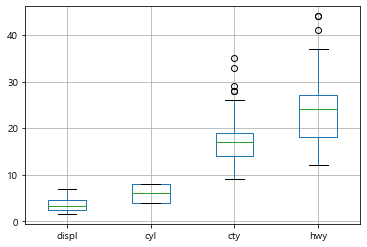

In [9]:
# 양적 자료의 데이터 분포 확인(boxplot)
dataset[['displ','cyl','cty','hwy']].boxplot()

In [10]:
# 질적 자료에 대한 데이터 빈도 확인(value_counts)
# 제조회사
print('제조회사 데이터 빈도 확인')
print(dataset['manufacturer'].value_counts(),"\n")

# 모델명
print('모델명 데이터 빈도 확인')
print(dataset['model'].value_counts())

제조회사 데이터 빈도 확인
dodge         37
toyota        34
volkswagen    27
ford          25
chevrolet     19
audi          18
hyundai       14
subaru        14
nissan        13
honda          9
jeep           8
pontiac        5
land rover     4
mercury        4
lincoln        3
Name: manufacturer, dtype: int64 

모델명 데이터 빈도 확인
caravan 2wd               11
ram 1500 pickup 4wd       10
mustang                    9
civic                      9
jetta                      9
dakota pickup 4wd          9
impreza awd                8
a4 quattro                 8
grand cherokee 4wd         8
tiburon                    7
camry                      7
toyota tacoma 4wd          7
durango 4wd                7
sonata                     7
camry solara               7
f150 pickup 4wd            7
a4                         7
passat                     7
altima                     6
forester awd               6
4runner 4wd                6
explorer 4wd               6
new beetle                 6
corvette      

In [11]:
# 질적 자료에 대한 데이터 빈도 확인(value_counts)
# 변속기 종류
print('변속기 종류 데이터 빈도 확인')
print(dataset['trans'].value_counts(),"\n")


# 구동방식
print('구동방식 데이터 빈도 확인')
print(dataset['drv'].value_counts())

변속기 종류 데이터 빈도 확인
auto(l4)      83
manual(m5)    58
auto(l5)      39
manual(m6)    19
auto(s6)      16
auto(l6)       6
auto(av)       5
auto(s5)       3
auto(s4)       3
auto(l3)       2
Name: trans, dtype: int64 

구동방식 데이터 빈도 확인
f    106
4    103
r     25
Name: drv, dtype: int64


In [12]:
# 질적 자료에 대한 데이터 빈도 확인(value_counts)
# 연료종류
print('연료종류 데이터 빈도 확인')
print(dataset['fl'].value_counts())
# 자동차 종류  
print('자동차 종류  데이터 빈도 확인')
print(dataset['class'].value_counts())

연료종류 데이터 빈도 확인
r    168
p     52
e      8
d      5
c      1
Name: fl, dtype: int64
자동차 종류  데이터 빈도 확인
suv           62
compact       47
midsize       41
subcompact    35
pickup        33
minivan       11
2seater        5
Name: class, dtype: int64


In [13]:
# [문제01]
# 자동차 배기량(displ)에 따라 고속도로 연비(hwy)가 다른지를 알아보자
# 배기량이 4 이하인 자동차와 5이상인 자동차 중 
# 어떤 자동차의 고속도로연비가 평균적으로 높은지 알아보자
# dataframe - query() -- where조건절을 유사

under_4=dataset.query('displ<=4')['hwy'].mean()
up_5=dataset.query('displ>=5')['hwy'].mean()
print("배기량 4이하인 자동차의 고속도로 평균 연비:",under_4)
print("배기량 5이상인 자동차의 고속도로 평균 연비:",up_5)

if under_4>up_5:
    print('배기량이 4이하인 자동차의 고속도로 연비가  5이상인 자동차보다 평균적으로 더 높습니다')
else:
    print('배기량이 5이상인 자동차의 고속도로 연비가  4이하인 자동차보다 평균적으로 더 높습니다')


배기량 4이하인 자동차의 고속도로 평균 연비: 25.96319018404908
배기량 5이상인 자동차의 고속도로 평균 연비: 18.07894736842105
배기량이 4이하인 자동차의 고속도로 연비가  5이상인 자동차보다 평균적으로 더 높습니다


In [14]:
# [문제 02]
# 자동차 제조 회사에 따라 도시 연비가 다른지 알아보려고 한다. 
# audi와 toyota 중 어느 manufacturer(자동차 제조 회사)의 cty(도시연비)가 평균적으로 더 높은지 알아보시오.
audi_toyota_cty_frm=dataset[(dataset['manufacturer']=='audi') |( dataset['manufacturer']=='toyota') ][['manufacturer','cty']]
ex02_frm=audi_toyota_cty_frm.groupby('manufacturer').agg('mean')
display(ex02_frm)
if (ex02_frm.loc['audi'].values) > (ex02_frm.loc['toyota'].values):
    print('audi 회사 자동차의 cty(도시연비)가 toyota보다 평균적으로 더 높습니다')
else:
    print('toyota 회사 자동차의 cty(도시연비)가 audi보다 평균적으로 더 높습니다')


,cty
manufacturer,
audi,17.611111
toyota,18.529412


toyota 회사 자동차의 cty(도시연비)가 audi보다 평균적으로 더 높습니다


In [15]:
# [문제 03]
# chevrolet, ford, honda 자동차의 고속도로 연비 평균을 알아보려고 한다. 
# 이 회사들의 데이터를 추출한 후 hwy 전체 평균을 확인하시오.

cfh_frm=dataset[(dataset['manufacturer']=='chevrolet')|(dataset['manufacturer']=='ford')|(dataset['manufacturer']=='honda')]
hwy_cfh_frm=cfh_frm[['manufacturer','hwy']]
display(hwy_cfh_frm.groupby('manufacturer').agg('mean')) # 회사별 hwy 평균
print()
# chevrolet, ford, honda 회사 hwy전체평균
print("chevrolet, ford, honda 회사 hwy전체평균:",hwy_cfh_frm['hwy'].mean())

# query로 작성시
# manufacturer_list = ['chevrolet','ford' ,'honda']
# dataset.query('manufacturer in @manufacturer_list')['hwy'].mean()

,hwy
manufacturer,
chevrolet,21.894737
ford,19.360000
honda,32.555556



chevrolet, ford, honda 회사 hwy전체평균: 22.50943396226415


In [16]:
# 연료가격 변수 추가(price_f)
# c : 가스 2.35 , d : 디젤 2.38 , e : 에탄올 2.11 , p : 고급휘발유 2.76, r : 보통휘발유 2.22

temp_frm = pd.DataFrame({
    'fl':['c','d','e','p','r'],
    'price_fl':[2.35, 2.38, 2.11, 2.76, 2.22]
})
temp_frm

merge_dataset = pd.merge(dataset, temp_frm, on='fl',how='inner')
merge_dataset

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,price_fl
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,2.76
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,2.76
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,2.76
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,2.76
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,2.76
...,...,...,...,...,...,...,...,...,...,...,...,...
229,jeep,grand cherokee 4wd,3.0,2008,6,auto(l5),4,17,22,d,suv,2.38
230,volkswagen,jetta,1.9,1999,4,manual(m5),f,33,44,d,compact,2.38
231,volkswagen,new beetle,1.9,1999,4,manual(m5),f,35,44,d,subcompact,2.38
232,volkswagen,new beetle,1.9,1999,4,auto(l4),f,29,41,d,subcompact,2.38


In [17]:
# 병합한 프레임에서 model, fl, price_fl만 추출한다면?
merge_dataset[['model','fl','price_fl']]
# merge_dataset.filter(['model','fl','price_fl'])

,model,fl,price_fl
0,a4,p,2.76
1,a4,p,2.76
2,a4,p,2.76
3,a4,p,2.76
4,a4,p,2.76
...,...,...,...
229,grand cherokee 4wd,d,2.38
230,jetta,d,2.38
231,new beetle,d,2.38
232,new beetle,d,2.38


In [71]:
# 데이터 전처리 과정에서 결측값 확인하기
# 구동방식(drv) 별 고속도로 연비(hwy)평균
# 임의적으로 결측값 처리를 위해서 더미 값을 넣어보도록 하자
drv_hwy_frm=dataset[['drv','hwy']]
print("hwy 결측값 개수 확인 : ",drv_hwy_frm['hwy'].isnull().sum()) # 결측값 없음.
drv_hwy_frm_grp=drv_hwy_frm.groupby('drv').agg('mean')
drv_hwy_frm_grp

hwy 결측값 개수 확인 :  0


,hwy
drv,
4,19.174757
f,28.160377
r,21.000000


<AxesSubplot:xlabel='drv'>

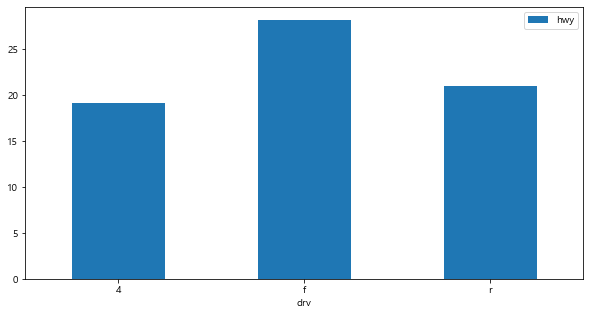

In [90]:
# hwy변수의 결측값을 제외하고, 어떤 구동방식의 고속도로평균 연비가 높은지 알아보자
drv_hwy_frm_grp[drv_hwy_frm_grp['hwy'].values==np.max(drv_hwy_frm_grp.values)]

# 구동방식별 연비평균을 비교하기 위한 막대 그래프로 시각화 해 보자
drv_hwy_frm_grp.plot(kind = 'bar',figsize=(10,5),
                    rot=0)

hwy 결측값 개수 확인 :  0


<AxesSubplot:xlabel='drv'>

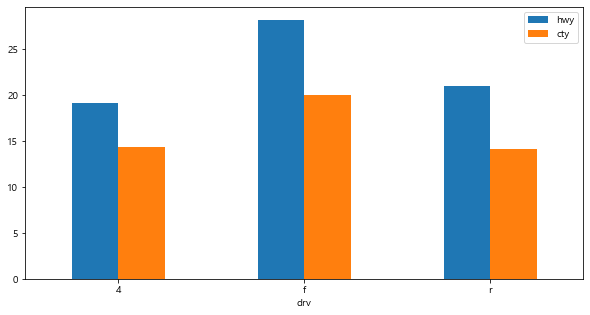

In [95]:
# 위에서 했던 방식과 동일하게 구동방식별 고속도로, 도시연비의 평균을 구해보고

drv_hwy_cty_frm=dataset[['drv','hwy','cty']]
print("hwy 결측값 개수 확인 : ",drv_hwy_frm['hwy'].isnull().sum()) # 결측값 없음.
drv_hwy_cty_frm_grp=drv_hwy_cty_frm.groupby('drv').agg('mean')
drv_hwy_cty_frm_grp

# hwy변수의 결측값을 제외하고, 어떤 구동방식의 고속도로평균 연비가 높은지 알아보자
drv_hwy_cty_frm_grp[drv_hwy_cty_frm_grp['hwy'].values==np.max(drv_hwy_cty_frm_grp.values)]

# 이를 데이터 프레임으로 만들어서 막대바로 시각화 해 보자

drv_hwy_cty_frm_grp.plot(kind = 'bar',figsize=(10,5),
                    rot=0)

<AxesSubplot:>

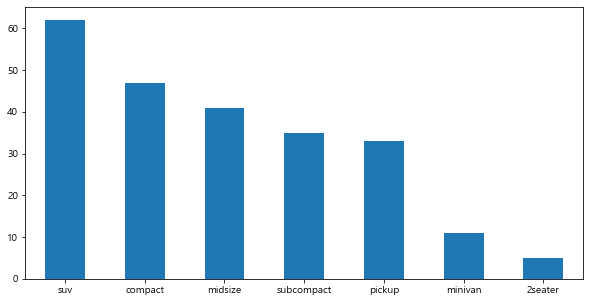

In [98]:
# 자동차(class)중에서 어떤 자동차가 가장 많은지 알아보려고 한다.
# 종류별 빈도를 막대바로 시각화 해 보자
class_freq=dataset['class'].value_counts()
class_freq.plot(kind = 'bar',figsize=(10,5),
                    rot=0)

,cty
manufacturer,
subaru,18.833333
toyota,14.375000
nissan,13.750000
jeep,13.500000
mercury,13.250000


<AxesSubplot:xlabel='manufacturer'>

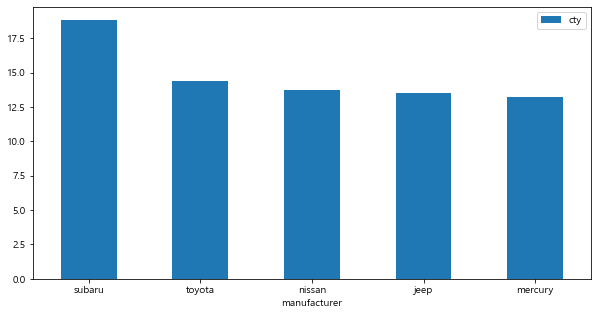

In [108]:
# 어떤 회사에서 생산한 suv 차종의 도시 연비가 높은지를 알아보려고 한다
# suv 차종을 대상으로 평균 도시연비가 가장 높은 회사 다섯곳을 막대 바로 시각화 해 보자
suv_cty_frm=dataset[dataset['class']=='suv'][['manufacturer','cty']]
suv_cty_frm_grp=suv_cty_frm.groupby('manufacturer').agg('mean')
suv_cty_frm_grp_top5=suv_cty_frm_grp.sort_values(by='cty',ascending=False).head()
display(suv_cty_frm_grp_top5)

suv_cty_frm_grp_top5.plot(kind = 'bar',figsize=(10,5),
                    rot=0)

<AxesSubplot:>

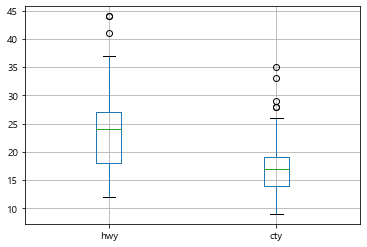

In [18]:
# 시각화


# 이상치 정제
# car_mpg 데이터에서 구동방식별 고속도로 연비 평균과 도시연비 평균을 극단치를 제외하고 확인
# 각 연비별 이상치 확인 boxplot()

outlier_frm=dataset.filter(['hwy','cty'])
outlier_frm.boxplot()

In [25]:
# 3사분위 정보를 얻어본다면
print()
print("3사분위: \n",outlier_frm.quantile(q=0.75))


# 1사분위 정보를 얻어본다면
print()
print('1사분위: \n', outlier_frm.quantile(q=0.25))

# IQR (3사분위 수 - 1사분위 수의 차)
print()
iqr=outlier_frm.quantile(q=0.75)-outlier_frm.quantile(q=0.25)
print('IQR (3사분위 수 - 1사분위 수의 차): \n',iqr )


# 최저 한계치(lower fence) 
print()
lower=outlier_frm.quantile(q=0.25)-(1.5*iqr)
print('lower fence:',lower)
# 최고 한계치(upper fence)
print()
upper=outlier_frm.quantile(q=0.75)+(1.5*iqr)
print('upper fence:',upper)


3사분위: 
 hwy    27.0
cty    19.0
Name: 0.75, dtype: float64

1사분위: 
 hwy    18.0
cty    14.0
Name: 0.25, dtype: float64

IQR (3사분위 수 - 1사분위 수의 차): 
 hwy    9.0
cty    5.0
dtype: float64

lower fence: hwy    4.5
cty    6.5
dtype: float64

upper fence: hwy    40.5
cty    26.5
dtype: float64


In [26]:
# 극단치 경계 값을 얻어 보자 (아래 수평선)
lower_outlier = outlier_frm[outlier_frm>lower].min()
print('극단치 경계 값을 얻어 보자 (아래 수평선):',lower_outlier)
# 극단치 경계 값을 얻어 보자 (위 수평선)
upper_outlier = outlier_frm[outlier_frm<upper].max()
print('극단치 경계 값을 얻어 보자 (위 수평선)',upper_outlier )

극단치 경계 값을 얻어 보자 (아래 수평선): hwy    12
cty     9
dtype: int64
극단치 경계 값을 얻어 보자 (위 수평선) hwy    37.0
cty    26.0
dtype: float64


In [36]:
# 이상치를 결측값으로 변경
# 고속도로 연비의 이상치 데이터 추출
hwy_outlier_frm=dataset[(dataset['hwy']<lower_outlier['hwy'])|(dataset['hwy']>upper_outlier['hwy'])]
display(hwy_outlier_frm)

# 도시 연비의 이상치 데이터 추출
cty_outlier_frm=dataset[(dataset['cty']<lower_outlier['cty'])|(dataset['cty']>upper_outlier['cty'])]
display(cty_outlier_frm)

# hwy 연비에 대한 이상치를 결측값으로 변경
clean_frm = dataset.copy()
for idx in hwy_outlier_frm.index:
    clean_frm.loc[idx,'hwy']=np.NaN
# 도시 연비에 대한 이상치를 결측값으로 변경
for idx in cty_outlier_frm.index:
    clean_frm.loc[idx,'cty']=np.NaN

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
212,volkswagen,jetta,1.9,1999,4,manual(m5),f,33,44,d,compact
221,volkswagen,new beetle,1.9,1999,4,manual(m5),f,35,44,d,subcompact
222,volkswagen,new beetle,1.9,1999,4,auto(l4),f,29,41,d,subcompact


,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
99,honda,civic,1.6,1999,4,manual(m5),f,28,33,r,subcompact
196,toyota,corolla,1.8,2008,4,manual(m5),f,28,37,r,compact
212,volkswagen,jetta,1.9,1999,4,manual(m5),f,33,44,d,compact
221,volkswagen,new beetle,1.9,1999,4,manual(m5),f,35,44,d,subcompact
222,volkswagen,new beetle,1.9,1999,4,auto(l4),f,29,41,d,subcompact


In [37]:
# 결측값 있는지 확인
clean_frm.filter(['hwy','cty']).isna().sum()

hwy    3
cty    5
dtype: int64

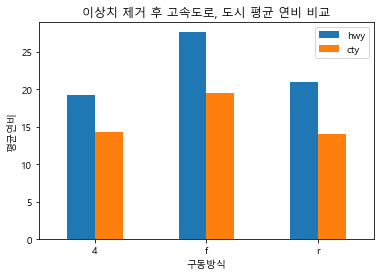

In [38]:
# 결측값 제거한 구동방식별 고속도로, 도시 연비 평균으로 시각화

clean_frm.filter(['drv','hwy','cty']).dropna().groupby('drv').mean().plot(kind='bar',rot=0)
plt.title('이상치 제거 후 고속도로, 도시 평균 연비 비교')
plt.xlabel('구동방식')
plt.ylabel('평균연비')

plt.show()
plt.close()